In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Load data and remove irrelevant variables

In [2]:
data = pd.read_csv("../02_data_preparation/yoghurt_w_dummy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21251 entries, 0 to 21250
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21251 non-null  int64  
 1   first_purchase             21251 non-null  bool   
 2   shelf_price                21251 non-null  float64
 3   pct_disc                   21251 non-null  float64
 4   pct_retail_disc            21251 non-null  float64
 5   pct_coupon_disc            21251 non-null  float64
 6   display_1                  21251 non-null  int64  
 7   display_2                  21251 non-null  int64  
 8   display_3                  21251 non-null  int64  
 9   display_4                  21251 non-null  int64  
 10  display_5                  21251 non-null  int64  
 11  display_6                  21251 non-null  int64  
 12  display_7                  21251 non-null  int64  
 13  display_9                  21251 non-null  int

In [3]:
data.drop(labels=["Unnamed: 0", "display_1", "display_5", "display_A", "campaign_6.0", "campaign_30.0", "description_TypeC"],
          axis = 1, inplace = True)

In [4]:
pd.set_option("display.max_columns", None)
data.describe(include = "all")

,first_purchase,shelf_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_2,display_3,display_4,display_6,display_7,display_9,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,marital_status_A,marital_status_B,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_19-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,income_100-124K,income_125-149K,income_15-24K,income_150-174K,income_175-199K,income_200-249K,income_25-34K,income_250K+,income_35-49K,income_50-74K,income_75-99K,income_Under 15K,hhsize_1,hhsize_2,hhsize_3,hhsize_4,hhsize_5+,campaign_8.0,campaign_13.0,campaign_18.0,campaign_29.0,description_TypeA,description_TypeB
count,21251,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.00000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.156933,0.158316,0.153330,0.004987,0.011152,0.007623,0.001082,0.005459,0.012046,0.004047,0.148699,0.001223,0.048751,0.008235,0.005270,0.488918,0.125406,0.686321,0.015152,0.005176,0.037834,0.061974,0.295092,0.314009,0.147711,0.122677,0.159240,0.098537,0.102254,0.63997,0.042727,0.211896,0.276975,0.347701,0.067009,0.053692,0.080420,0.074820,0.054586,0.085972,0.017646,0.006870,0.079384,0.017646,0.180086,0.224037,0.126394,0.052139,0.280975,0.374476,0.156746,0.089596,0.098207,0.076373,0.077879,0.075855,0.006776,0.230248,0.006776
std,NaN,1.104681,0.145841,0.137543,0.044610,0.105017,0.086979,0.032881,0.073682,0.109096,0.063488,0.355800,0.034958,0.215351,0.090374,0.072407,0.499889,0.331186,0.463999,0.122161,0.071761,0.190798,0.241113,0.456095,0.464131,0.354821,0.328073,0.365908,0.298046,0.302989,0.48002,0.202247,0.408661,0.447515,0.476252,0.250043,0.225413,0.271948,0.263107,0.227175,0.280330,0.131665,0.082604,0.270344,0.131665,0.384268,0.416956,0.332301,0.222312,0.449486,0.483999,0.363569,0.285609,0.297602,0.265600,0.267987,0.264773,0.082040,0.421001,0.082040
min,NaN,0.350000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.400000,0.

## Build XGBoost model

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import xgboost as xgb

In [6]:
X = data.drop("first_purchase", axis = 1)
y = data["first_purchase"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

In [8]:
xgb =  xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [9]:
cv = StratifiedShuffleSplit(n_splits = 5) 

In [11]:
#crossval metrics for xgb base model
scores = ["f1", "precision", "recall", "accuracy"]

for score in scores:
    list_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring = score )
    print(list_scores.mean())

0.5626813135832048
0.696952016319861
0.4666666666666666
0.7530588235294118


In [12]:
y_pred = xgb.predict(X_test)

In [13]:
#metrics for xgb base model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred))

0.5522698875468556
0.6856256463288521
0.46234309623430964
0.7471183250999764


In [14]:
y_pred_train = xgb.predict(X_train)
#metrics for model- TRAIN
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_train, y_pred_train))

0.6687774486773568
0.8070002464875524
0.5709801185908615
0.809235294117647


In [15]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#Hyperparameter tuning

In [17]:
import scipy

In [21]:
rand_params = {'max_depth': scipy.stats.randint(3, 15), "subsample": np.arange(0.6,1,0.1), "colsample_bytree": np.arange(0.6,1,0.1),
              "n_estimators": scipy.stats.randint(50, 250), "learning_rate": np.arange(0.05,0.3,0.05)}

In [22]:
rand_search = RandomizedSearchCV(xgb, rand_params, n_iter=30, scoring = "f1", cv = cv)

In [23]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=Non...
                                           predictor=None, random_state=None, ...),
                   n_iter=30,
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9]),
                                        'learning_rat

In [24]:
rand_search.best_score_

0.6376685071260025

In [25]:
rand_search.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.15000000000000002,
 'max_depth': 14,
 'n_estimators': 245,
 'subsample': 0.7999999999999999}

In [27]:
#grid_params = {"max_depth": [10, 15, 20], "subsample": [0.7, 0.8, 0.9], "colsample_bytree": [0.7, 0.8], 
#               "n_estimators": [100, 200, 250], "learning_rate": [0.1, 0.15, 0.2]}

In [28]:
#grid = GridSearchCV(xgb, param_grid = grid_params, scoring = "f1", cv = cv)

In [30]:
#grid.fit(X_train, y_train)
#interrupted due to unreasonable computing time

In [ ]:
#grid.best_score_

In [ ]:
#grid.best_estimator_

#Validation

In [31]:
from plotting import plot_learning_curve, plot_validation_curve

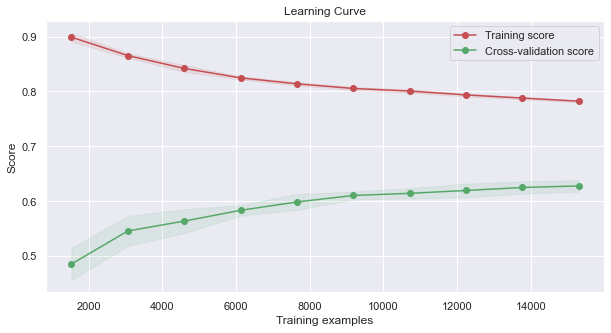

In [33]:
learning_curve = plot_learning_curve(rand_search.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.1, 1, 10), scoring = "f1")           

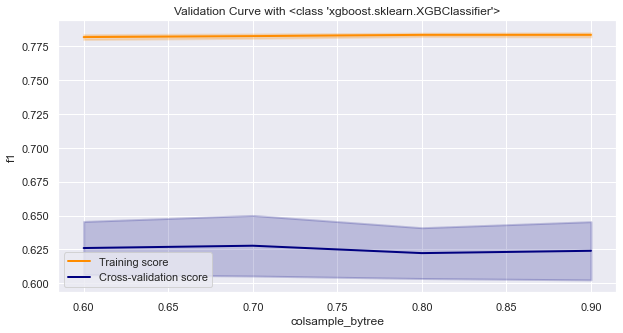

In [34]:
val_colsample_bytree = plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv = cv, 
                                      param_name ="colsample_bytree", param_range = np.arange(0.6,1,0.1), scoring = "f1")

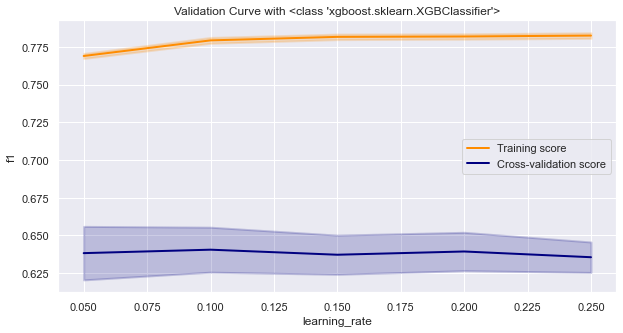

In [35]:
val_learning_rate = plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=cv,
                                             param_name="learning_rate", param_range = np.arange(0.05,0.3,0.05), scoring = "f1")

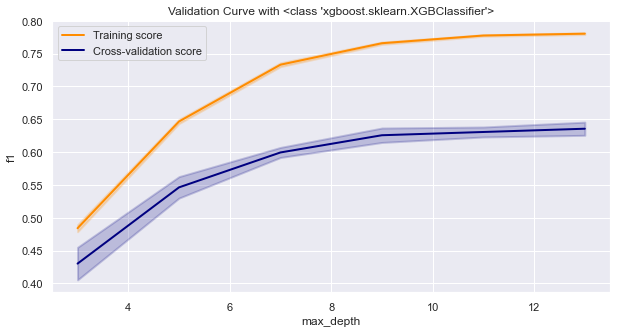

In [36]:
val_max_depth = plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=cv,
                                              param_name = "max_depth", param_range = np.arange(3,15,2), scoring="f1")

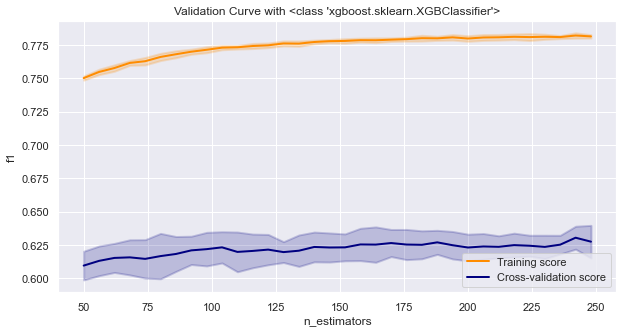

In [37]:
val_n_estimators = plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=cv,
                                              param_name = "n_estimators", param_range = np.arange(50,250,6), scoring="f1")

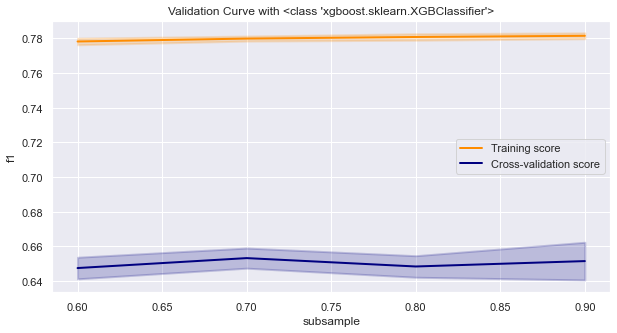

In [39]:
val_subsample = plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=cv,
                                              param_name = "subsample", param_range = np.arange(0.6,1,0.1), scoring="f1")

#Best model

In [42]:
fav_model = xgb.XGBClassifier(max_depth = 14, subsample = 0.7, colsample_bytree = 0.7, learning_rate = 0.1, n_estimators = 245)
fav_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=245, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
#crossval metrics for fav model
scores = ["f1", "precision", "recall", "accuracy"]

for score in scores:
    list_scores = cross_val_score(fav_model, X_train, y_train, cv=cv, scoring = score )
    print(list_scores.mean())

0.6247921120172063
0.7050381558083468
0.5776614310645725
0.7764705882352942


In [44]:
y_pred_fav = fav_model.predict(X_test)

In [45]:
#metrics for fav model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_fav))

0.6153265383163458
0.6707818930041153
0.5683403068340307
0.7602916960715126


In [46]:
y_pred_fav_train = fav_model.predict(X_train)
#metrics for fav model- TRAIN
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_train, y_pred_fav_train))

0.775004726791454
0.8462014863748968
0.7148587373561214
0.86


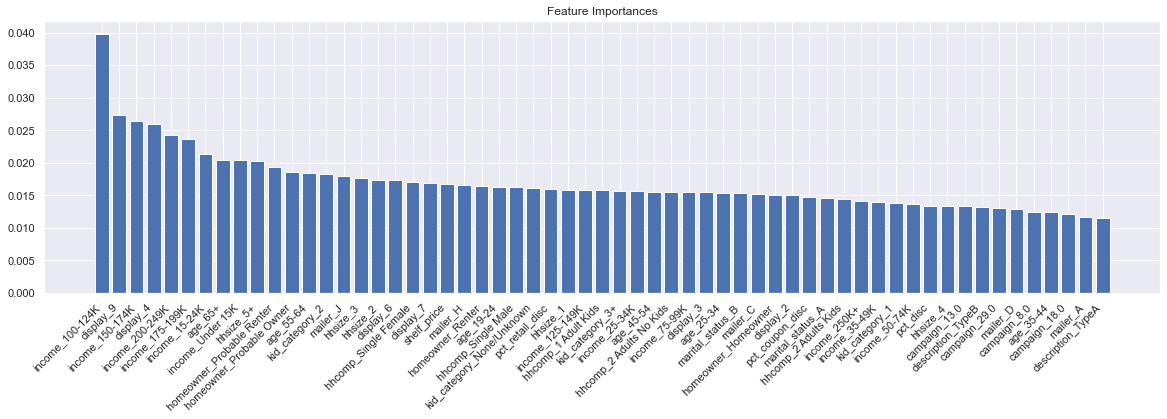

In [47]:
importances = fav_model.feature_importances_

indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');
